# Income Classification
In this project, we will be using a dataset containing information from the 1994 Census database to create a logistic regression model that predicts whether or not a person makes more than $50,000.

**Data Sources**
The information source comes from UCI Machine Learning Repository [here](https://archive.ics.uci.edu/dataset/20/census+income).

The information included is:
- `age`: continuous
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
- `sex`: Female, Male
- `capital-gain`: continuous
- `capital-loss`: continuous
- `hours-per-week`: continuous
- `native country`: discrete
- `income`: discrete, >50K, <=50K

# Import Python Modules
To start, import the preliminary modules that will be used in this project:

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
Now, lets visualize the data from `adult.csv` while also adding the names to columns. For better understanding, the column of income will be 1 when it is greater than 50k a year, and 0 when it is less.

In [3]:
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

df = pd.read_csv('adult.csv', header = None, names = col_names)

# Change values of column with income
df['income'] = df['income'].replace({' <=50K':0, ' >50K':1})

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


We also need to see if the data is imbalanced, to take into consideration while training the data.

In [4]:
df['income'].value_counts(normalize=True)

income
0    0.75919
1    0.24081
Name: proportion, dtype: float64

## Model Training

### Data Preprocessing
Moving forward, we'll prepare the data prior fitting the model. First, lets create the matrix that will hold the features to train the model. The method `get_dummies` will be used to one-hot encode the categorical columns and the attribute `drop_first` will be set to `True` to colinear features that could cause a problem at the time of creating the model. 

In [5]:
feature_cols = ['age','capital-gain', 'capital-loss', 'hours-per-week', 'sex','race', 'education']
X = df[feature_cols]
X = pd.get_dummies(X, columns=['sex','race', 'education'], dtype=int, drop_first=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       32561 non-null  int64
 1   capital-gain              32561 non-null  int64
 2   capital-loss              32561 non-null  int64
 3   hours-per-week            32561 non-null  int64
 4   sex_ Male                 32561 non-null  int64
 5   race_ Asian-Pac-Islander  32561 non-null  int64
 6   race_ Black               32561 non-null  int64
 7   race_ Other               32561 non-null  int64
 8   race_ White               32561 non-null  int64
 9   education_ 11th           32561 non-null  int64
 10  education_ 12th           32561 non-null  int64
 11  education_ 1st-4th        32561 non-null  int64
 12  education_ 5th-6th        32561 non-null  int64
 13  education_ 7th-8th        32561 non-null  int64
 14  education_ 9th            32561 non-nu

Now, lets see the correlation between values using a heatmap to see if there are any details of importance.

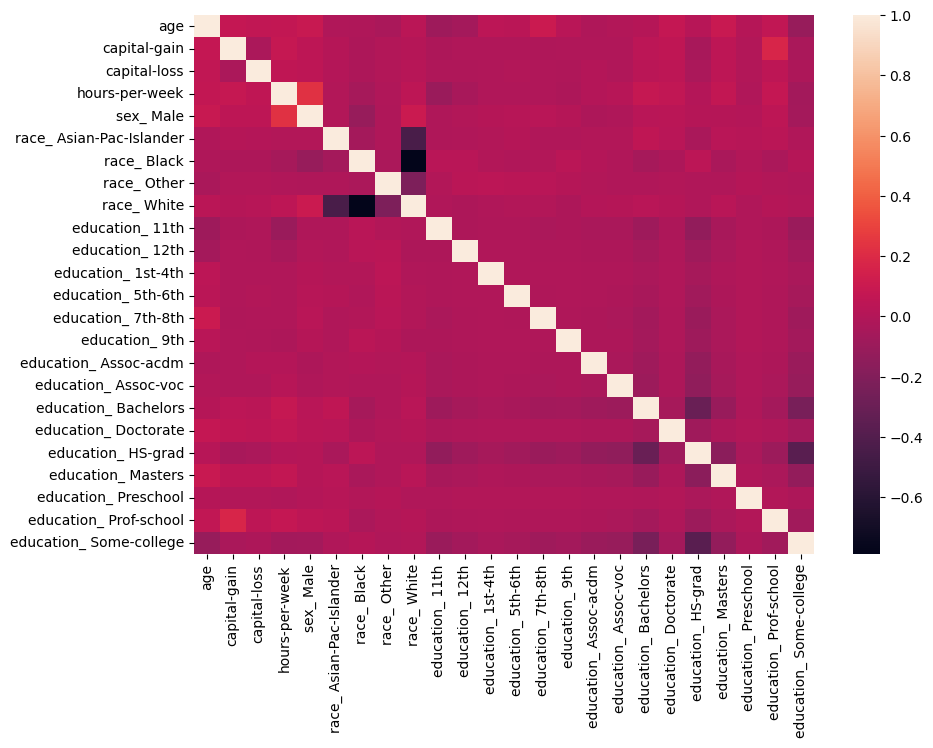

In [6]:
plt.figure(figsize = (10,7))
sns.heatmap(X.corr())
plt.show()

### Model Fitting
Next up, lets separate the dataset into training and testing samples that will be used for training and assesing the performance of the model.

In [7]:
# First, get the information about whether a person is getting more or less than 50k
y = df['income']

# Create the training and testing samples.
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=1)

Upon completing separating the data, the next step is to train the model and obtain the predictions.

In [58]:
# Create model while tuning hyperparameters
log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train)

# Obtain predictions and probabilities for analysis
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:,1]

# Show the model parameters
coefficients = log_reg.coef_
intercept = log_reg.intercept_

print('Model final parameters: ')
print('coefficients: ', coefficients)
print('intercept: ', intercept)

Model final parameters: 
coefficients:  [[ 3.68996395e-02  3.14928589e-04  6.66667657e-04  3.22241374e-02
   1.03311753e+00  0.00000000e+00 -3.30566703e-01  0.00000000e+00
   1.04534949e-01 -5.73104179e-01  0.00000000e+00  0.00000000e+00
  -3.98096085e-01 -8.95586928e-01 -5.01449368e-01  5.74988692e-01
   5.49605168e-01  1.28572830e+00  1.80011269e+00  0.00000000e+00
   1.60155344e+00  0.00000000e+00  1.82505556e+00  3.88670532e-01]]
intercept:  [-5.62625748]


### Model Testing
After fitting the model, lets evaluate the model. Accuracy, Precision, Recall, and F1 Score will be the evaluation metrics for the model.

In [50]:
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=['actual no', 'actual yes'],
    columns=['predicted no', 'predicted yes']
)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Confusion matrix:\n{conf_matrix}\n')
print(f'Test set accuracy:\t{accuracy}')
print(f'Test set precision:\t{precision}')
print(f'Test set recall:\t{recall}')
print(f'Test set f1-score:\t{f1}')

Confusion matrix:
            predicted no  predicted yes
actual no           4775            251
actual yes           880            607

Test set accuracy:	0.8263473053892215
Test set precision:	0.7074592074592074
Test set recall:	0.4082044384667115
Test set f1-score:	0.5176972281449893


### Analysis
Upon completing the assessing of the model, lets plot the parameters.
First, as we could see during model fitting, there are parameters in the model that have a value of 0. This parameters will be deleted.

In [51]:
# Obtain dataframe with coefficients and variables
parameters = pd.DataFrame(data=coefficients[0], index=list(X.columns), columns=["coeff"]).sort_values(by=["coeff"])

# Delete the coefficients that have a value of zero
rows_to_delete = parameters.query('coeff == 0').index
parameters = parameters.drop(rows_to_delete)
print(parameters)

                            coeff
education_ 7th-8th      -0.896674
education_ 11th         -0.574554
education_ 9th          -0.501962
education_ 5th-6th      -0.399990
race_ Black             -0.333975
capital-gain             0.000315
capital-loss             0.000667
hours-per-week           0.032111
age                      0.036812
race_ White              0.101443
education_ Some-college  0.386320
education_ Assoc-voc     0.548565
education_ Assoc-acdm    0.573831
sex_ Male                1.032467
education_ Bachelors     1.284545
education_ Masters       1.600675
education_ Doctorate     1.799759
education_ Prof-school   1.824591


Now, lets plot the coefficients. As we can see below, the variables that have a stronger impact on whether someone of 1994 made more or less than 50k were the education levels completed.

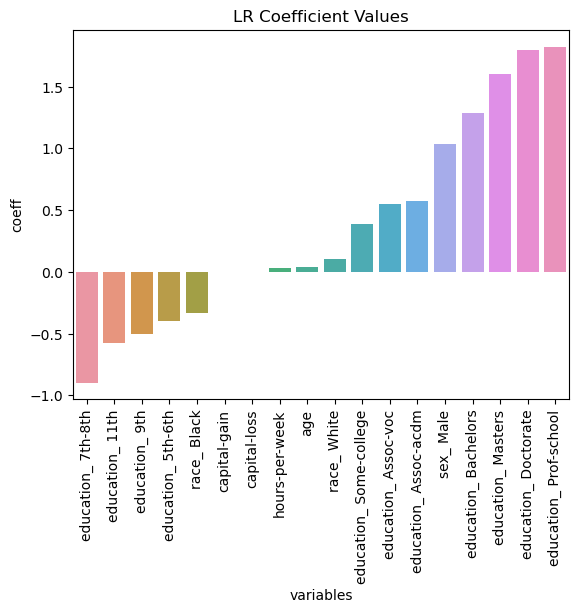

<Figure size 640x480 with 0 Axes>

In [52]:
sns.barplot(x=parameters.index, y=parameters.coeff)
plt.xticks(rotation=90)
plt.title('LR Coefficient Values')
plt.xlabel('variables')
plt.show()
plt.clf()

After checking the values of the coefficients, lets now plot the ROC curve and the AUC value. 

The Receiver Operating Characteristic (ROC) curve we can see the impact of different thresholds on TPR (how many people with income >50k did we got) vs FPR (how many people of income <=50k did we say had income of >50k).

The area under the curve (AUC) tells use how well the model distinguish between different incomes.

Area under the curve:  0.8457372035288724


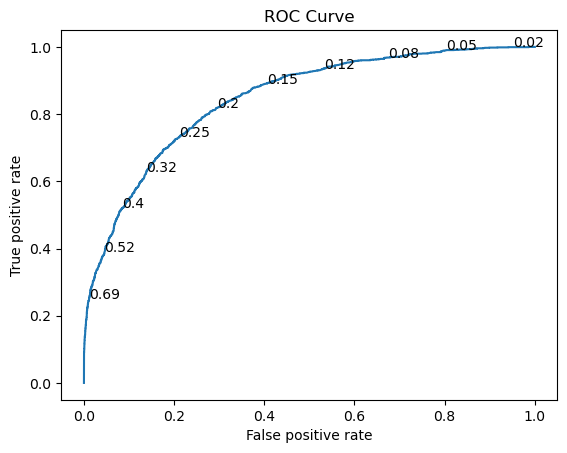

<Figure size 640x480 with 0 Axes>

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
rouc_auc = roc_auc_score(y_test, y_pred_proba)

print('Area under the curve: ', rouc_auc)

plt.plot(fpr, tpr, linestyle='-')
idx = list(range(len(fpr)))[100::200]
for i in idx:
    plt.text(fpr[i], tpr[i], thresholds[i].round(2))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()
plt.clf()